# Gathering basic stats on a Reddit data dump of Womens March discussions for Jan 18-25th

TODO:
 - count comments per window
 - write DFs for each window
 - average score per day
 - average score per user per day
 - is there a relationship between contraversy and score?
 - number of contraversies per day
 - write each timeframe to DF
 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

## get stats for dataframe functions

In [2]:
def plot_responses_per_user(df):
    responses_per_user = df['author'].value_counts()

    print(np.sum(responses_per_user==1), 'users commented only 1 time')
    print(np.max(responses_per_user), ' is the max number of comments by a single user')
    
    #plt.figure(figsize=[20,5])
    responses_per_user.plot(kind='bar')
    plt.title('responses per user', fontsize=20)
    plt.ylabel('responses', fontsize=14);
    
    
def plot_comments_per_linkID(df):    
    comments_per_linkID = df['link_id'].value_counts()
    
    print(len(comments_per_linkID), 'unique posts')
    print(np.sum(comments_per_linkID>1), 'unique posts with >1 comment')

    #plt.figure(figsize=[20,5])
    comments_per_linkID.plot(kind='bar')
    plt.title('Comments per ID', fontsize=20)
    plt.ylabel('comments', fontsize=14);    
    

def plot_comments_per_day(df):
    #plt.figure(figsize=[8,5])
    total_comments = df['OPcreatedAt'].groupby([df["OPcreatedAt"].dt.year, df["OPcreatedAt"].dt.month, df["OPcreatedAt"].dt.day]).count().sum()
    
    print(total_comments, 'comments')
    df['OPcreatedAt'].groupby([df["OPcreatedAt"].dt.year, df["OPcreatedAt"].dt.month, df["OPcreatedAt"].dt.day]).count().plot(kind="bar")
    plt.title('comments per day', fontsize=20);
    plt.ylabel('comments', fontsize=14)
    plt.xlabel('days', fontsize=14)
    
    
def plot_all_stats(df):
    plt.figure(figsize=[15,10])
    plt.subplot(311)
    plt.tight_layout()

    plot_comments_per_day(df)
    
    plt.subplot(312)
    plt.tight_layout()

    plot_responses_per_user(df)
    
    plt.subplot(313)
    plt.tight_layout()

    plot_comments_per_linkID(df)
    print()
    



## Remove all columns that are all NaN

In [3]:
data_dir = '/Users/gheimber/Desktop/Projects/SFI_ShapesAndShapingConsensus/Data/'
platform = 'Reddit'
topic = 'womens_march_red'
filename = 'womens_march_red_short.csv'
#filename = 'womens_march_red.csv'

womens_march_data = os.path.join(data_dir, platform, topic, filename)

In [4]:
# read in CSV
df = pd.read_csv(womens_march_data)

/anaconda3/envs/lung/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
np.sort(df.columns)

array(['Unnamed: 0', 'author', 'banned_at_utc', 'body',
       'controversiality', 'created_utc', 'downs', 'id', 'likes',
       'link_id', 'locked', 'num_comments', 'op_author', 'op_created_utc',
       'parent_id', 'promoted', 'removal_reason', 'replies', 'score',
       'selftext', 'subreddit', 'title', 'ups'], dtype=object)

## clean dataframe

In [6]:
# make a new field with easier datetime, remove old field with utc format
df['OPcreatedAt'] = pd.to_datetime(df['op_created_utc'], unit = 's')
df = df.drop(columns=['op_created_utc'])
df['createdAt'] = pd.to_datetime(df['created_utc'], unit = 's')
df = df.drop(columns=['created_utc'])


# remove data from before Election (Nov 9, 2016)
election_date = '2016-11-09 00:00:00'
df = df[df['createdAt']>election_date]

# Remove all columns that are all NaN
df = df[df.columns[~pd.isna(df).all()]]

In [7]:
df.columns

Index(['Unnamed: 0', 'link_id', 'op_author', 'locked', 'num_comments', 'score',
       'selftext', 'subreddit', 'title', 'author', 'body', 'controversiality',
       'id', 'parent_id', 'OPcreatedAt', 'createdAt'],
      dtype='object')

## create 3 windows of data, week_before, week_of, week_after Jan 18-25

In [25]:
# create windows of data keep data from Jan 18-25, 2018
jan18 = '2018-01-18 00:00:00'
jan25 = '2018-01-25 00:00:00'
week_of = df[(df['createdAt']>=jan18) & (df['createdAt']<jan25)]

feb01 = '2018-02-01 00:00:00'
week_after = df[(df['createdAt']>=jan25) & (df['createdAt']<feb01)]

jan11 = '2018-01-11 00:00:00'
week_before = df[(df['createdAt']>=jan11) & (df['createdAt']<jan18)]

## plot stats for each time window

173 comments
81 users commented only 1 time
11  is the max number of comments by a single user
24 unique posts
20 unique posts with >1 comment

3018 comments
781 users commented only 1 time
289  is the max number of comments by a single user
97 unique posts
87 unique posts with >1 comment

645 comments
133 users commented only 1 time
54  is the max number of comments by a single user
34 unique posts
28 unique posts with >1 comment



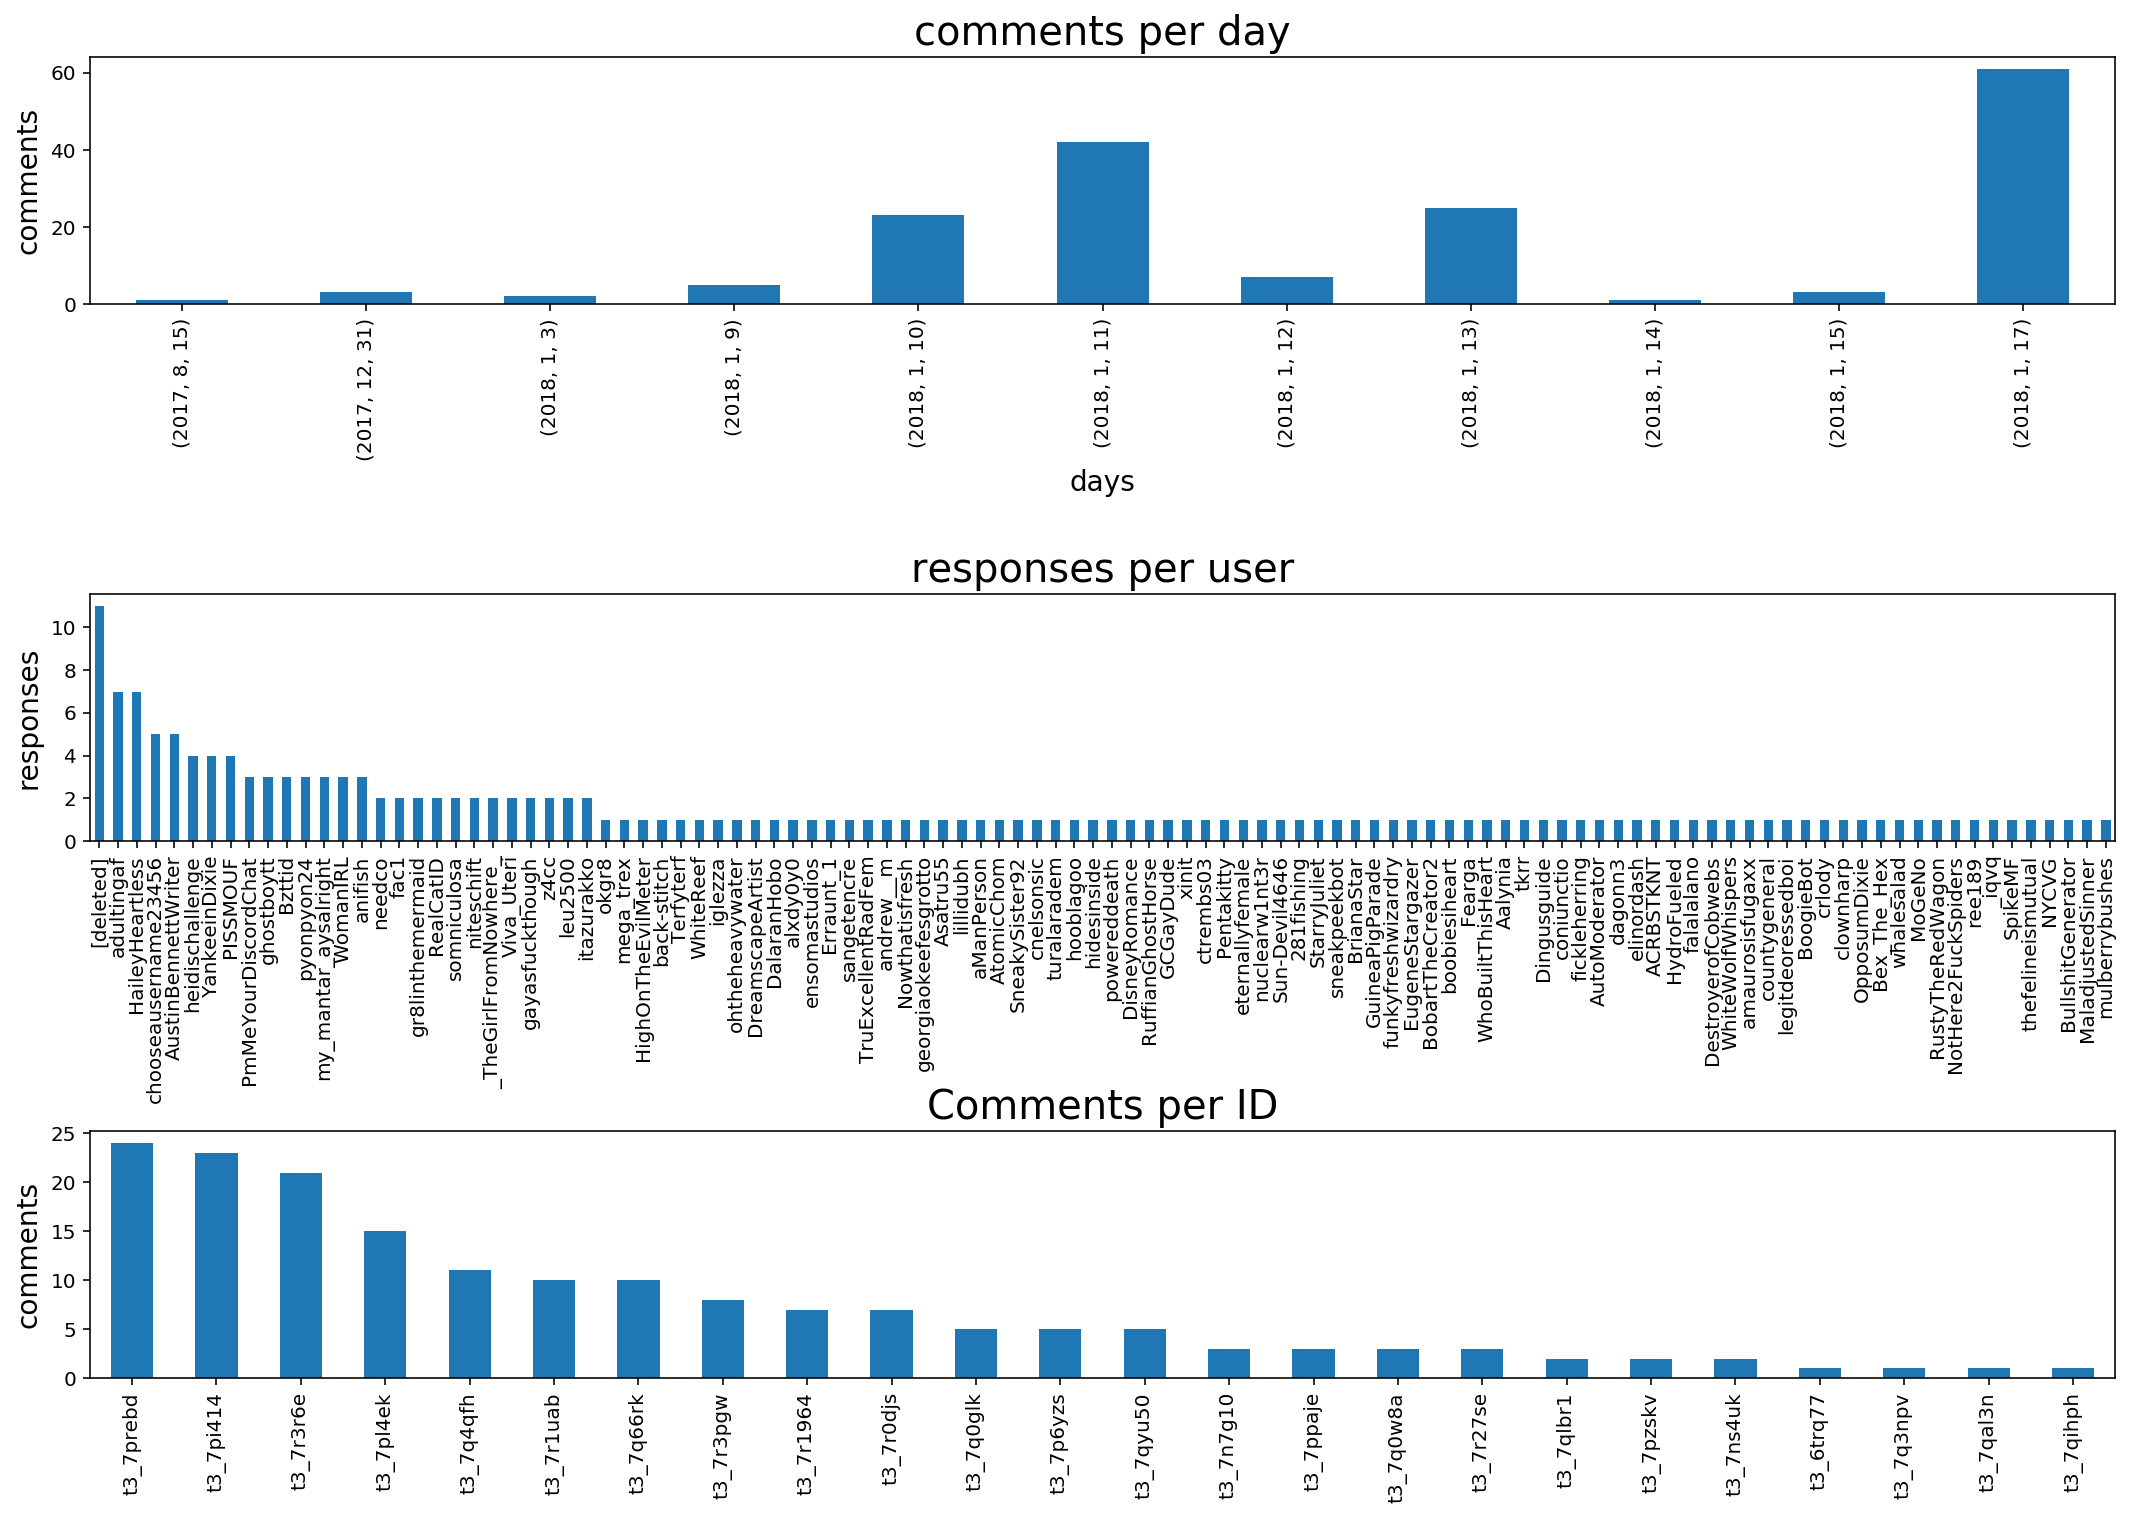

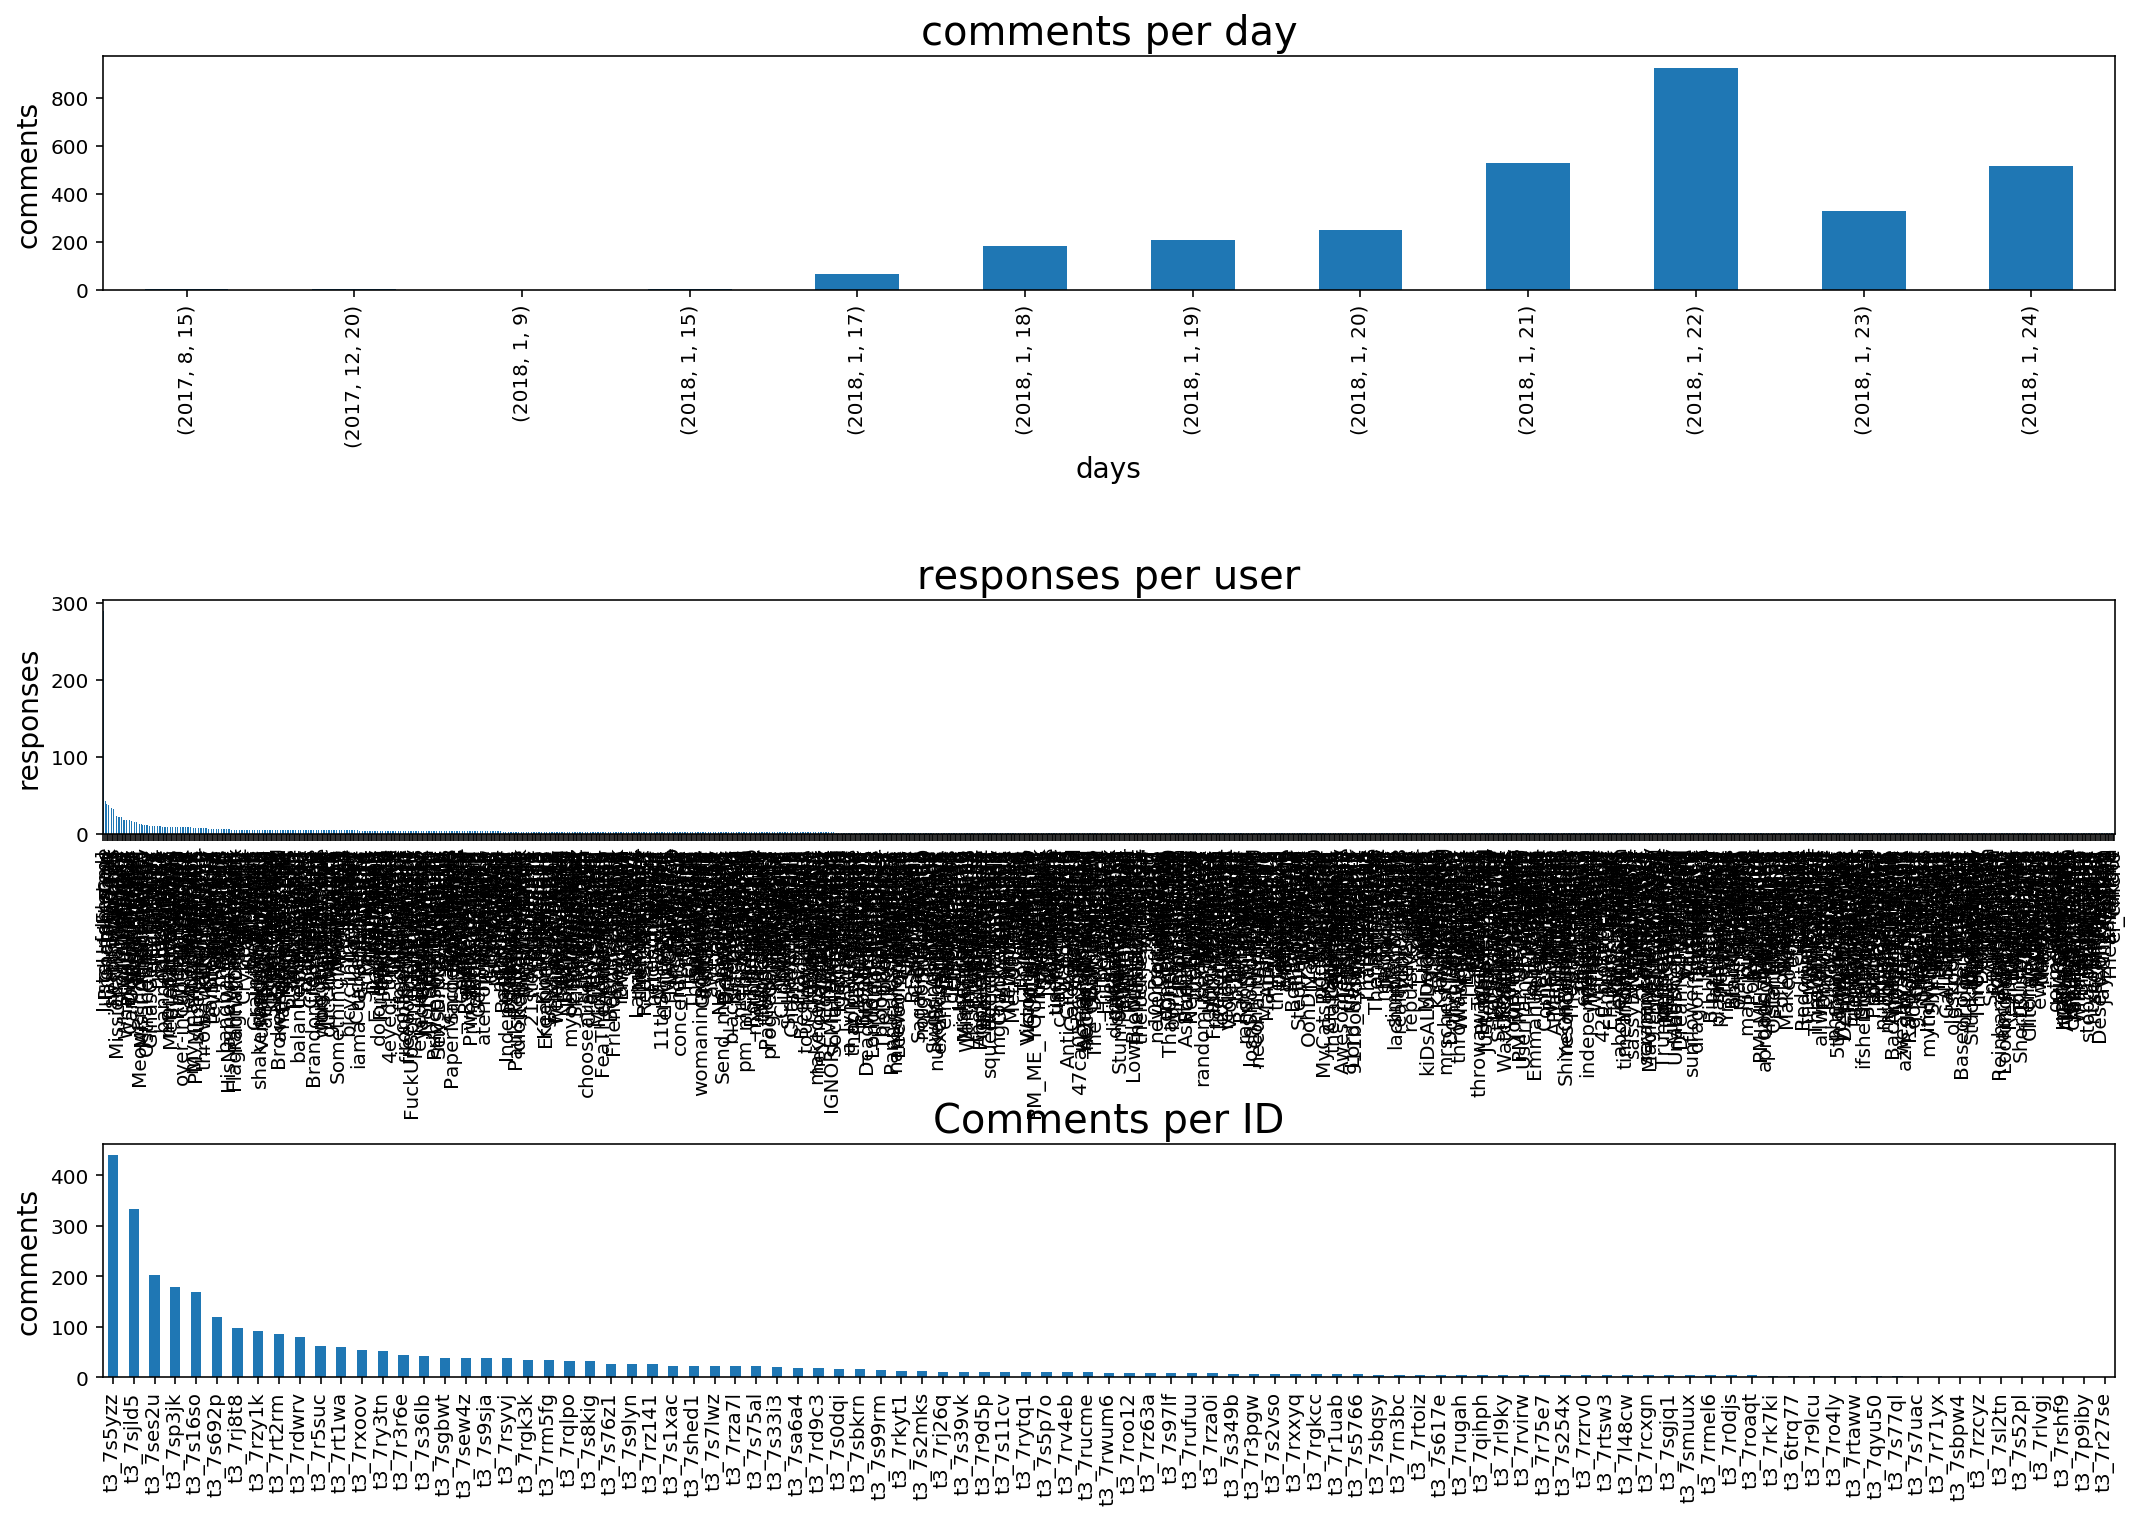

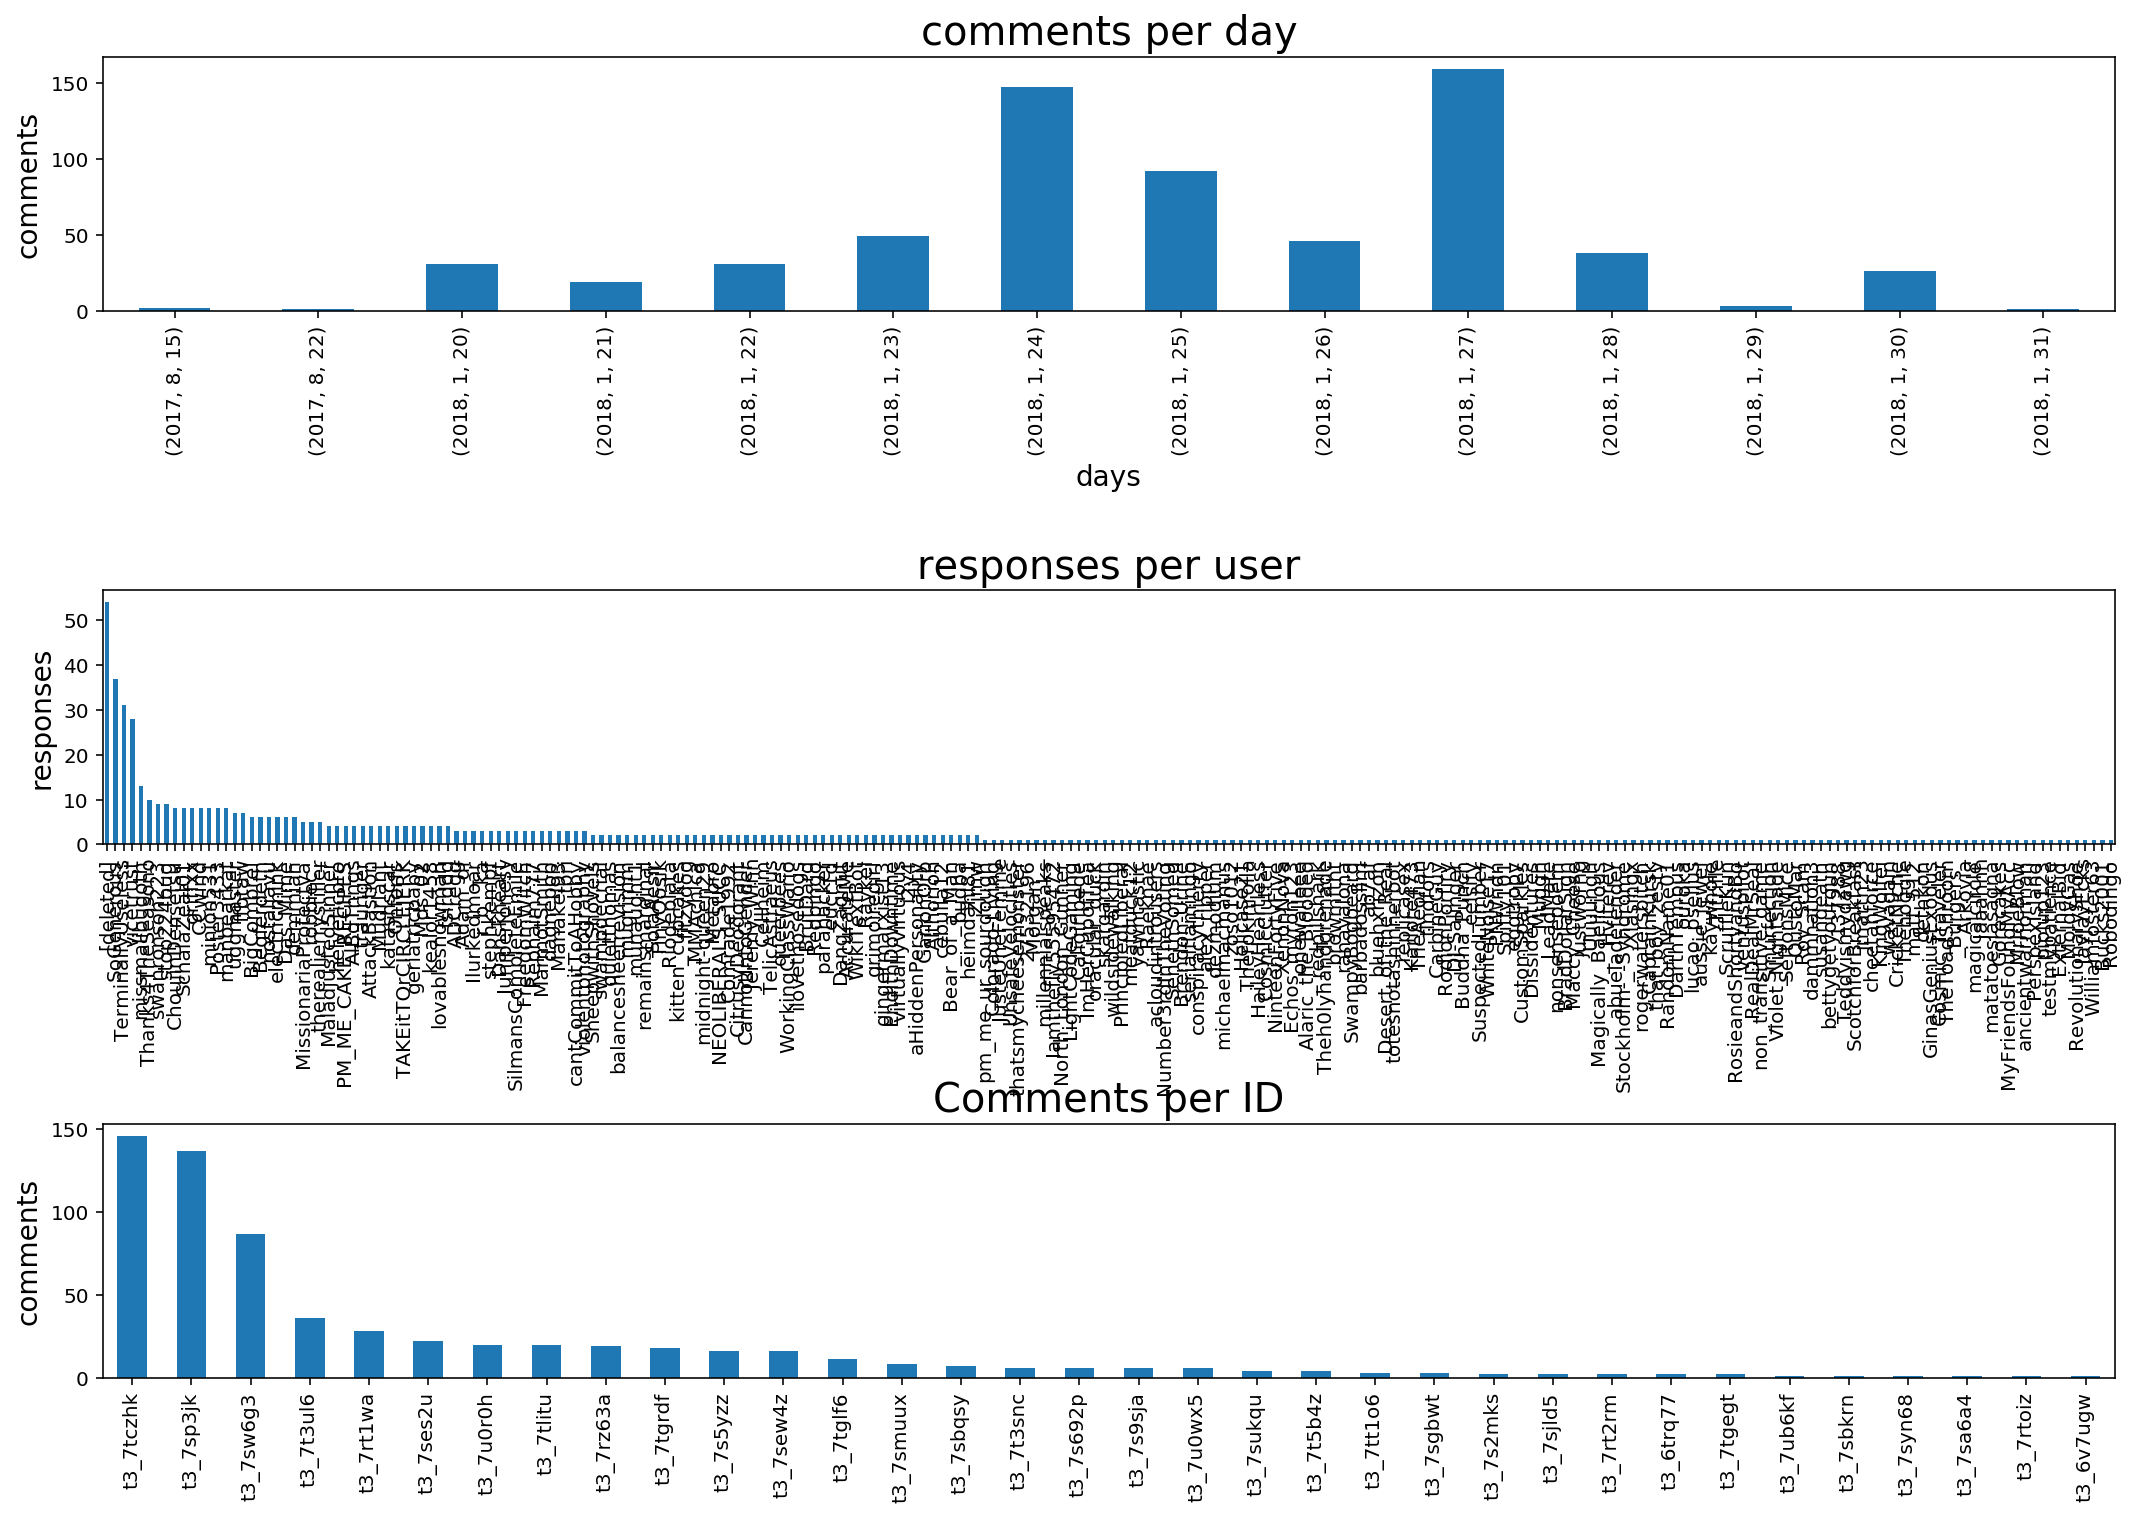

In [26]:
plot_all_stats(week_before)
plot_all_stats(week_of)
plot_all_stats(week_after)

## study score

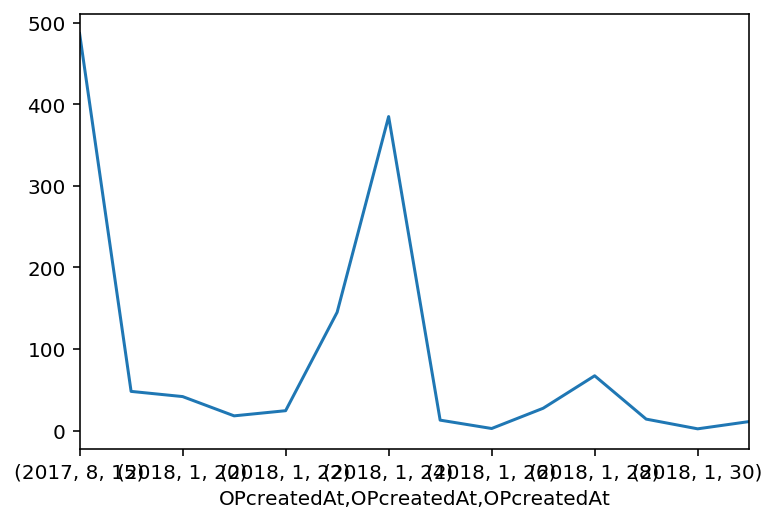

In [24]:
#df['score'].groupby([df["OPcreatedAt"].dt.year, df["OPcreatedAt"].dt.month, df["OPcreatedAt"].dt.day]).mean().plot()
#week_before['score'].groupby([week_before["OPcreatedAt"].dt.year, week_before["OPcreatedAt"].dt.month, week_before["OPcreatedAt"].dt.day]).mean().plot()
#week_of['score'].groupby([week_of["OPcreatedAt"].dt.year, week_of["OPcreatedAt"].dt.month, week_of["OPcreatedAt"].dt.day]).mean().plot()
week_after['score'].groupby([week_after["OPcreatedAt"].dt.year, week_after["OPcreatedAt"].dt.month, week_after["OPcreatedAt"].dt.day]).mean().plot()


In [11]:
a = week_of.groupby('author')[]

SyntaxError: invalid syntax (<ipython-input-11-e34908e2a4d1>, line 1)

In [ ]:
np.sum(week_of['controversiality'])
week_of.shape

In [ ]:
week_of.head()

In [36]:
df.head()

,Unnamed: 0,link_id,op_author,locked,num_comments,score,selftext,subreddit,title,author,body,controversiality,id,parent_id,OPcreatedAt,createdAt
0,0,t3_5ojp4k,robertfasher,False,23.0,0.0,"Besides, the Women's March on Saturday at City...",houston,Marches/protests this Friday-Sunday?,countrytime,That's one of the commonly pushed media lies. ...,1.0,dcjxke6,t1_dcjvtvx,2017-01-17 18:18:47,2017-01-17 20:01:33
1,1,t3_5ojp4k,robertfasher,False,23.0,0.0,"Besides, the Women's March on Saturday at City...",houston,Marches/protests this Friday-Sunday?,CramPacked,Where were the protestors against Bill Clinton...,0.0,dckgvr6,t1_dcjun1k,2017-01-17 18:18:47,2017-01-18 02:31:00
2,2,t3_5ojp4k,robertfasher,False,23.0,0.0,"Besides, the Women's March on Saturday at City...",houston,Marches/protests this Friday-Sunday?,[deleted],[removed],0.0,dcjzzls,t3_5ojp4k,2017-01-17 18:18:47,2017-01-17 20:47:19
3,3,t3_5ojp4k,robertfasher,False,23.0,0.0,"Besides, the Women's March on Saturday at City...",houston,Marches/protests this Friday-Sunday?,not_a_witch_,I can't believe that I'm re-fighting the gener...,0.0,dckhclz,t1_dcjvhqv,2017-01-17 18:18:47,2017-01-18 02:41:19
4,4,t3_5ojp4k,robertfasher,False,23.0,0.0,"Besides, the Women's March on Saturday at City...",houston,Marches/protests this Friday-Sunday?,CheapBeer,So because he did made the gestures in referen...,1.0,dck0x7u,t1_dcjxke6,2017-01-17 18:18:47,2017-01-17 21:04:47
